In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

transactions = pd.read_csv('C:/Users/Admin/Desktop/DATA/FRANCE/OpenClassroom/Project/P6/transactions.csv') #les ventes (appelées “Transactions”)
products = pd.read_csv('C:/Users/Admin/Desktop/DATA/FRANCE/OpenClassroom/Project/P6/products.csv') #la liste des produits
customers = pd.read_csv('C:/Users/Admin/Desktop/DATA/FRANCE/OpenClassroom/Project/P6/customers.csv') #la liste des clients

### Impression des informations des differentes DataFrame

In [2]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
None


In [3]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [4]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None


In [5]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [6]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None


In [7]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


### Utilisation d'une fonction pour confirmer la présence de valeurs nulles

In [8]:
#Méthode .isnull() (ou .isna())sur les données produits, renvoi de booléens par colonne
products.isnull().any()

id_prod    False
price      False
categ      False
dtype: bool

In [9]:
#Méthode .isnull() sur les données clients, renvoi de booléens par colonne
customers.isnull().any()

client_id    False
sex          False
birth        False
dtype: bool

In [10]:
#Méthode .isnull() sur les données transactions, renvoi de booléens par colonne
transactions.isnull().any()

id_prod       False
date          False
session_id    False
client_id     False
dtype: bool

### Vérification des valeurs aberrantes dans la DataFrame products

In [11]:
tri1 = products[products["price"]<=0]
print(tri1)

    id_prod  price  categ
731     T_0   -1.0      0


### Verification de la présence de doublons dans les différentes DataFrame

In [12]:
print(f"La table products possede {products.duplicated().sum()} doublons")

La table products possede 0 doublons


In [13]:
print(f"La table customers possede {customers.duplicated().sum()} doublons")

La table customers possede 0 doublons


In [14]:
print(f"La table transactions possede {transactions.duplicated().sum()} doublons")

La table transactions possede 126 doublons


#### Suppression des doublons de la DataFrame customers

In [15]:
transactions.drop_duplicates(inplace=True)

### Creation fonction test clé primaire

In [16]:
def cle_primaire(df_cle): # Vérification de la clé primaire
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print(f'La colonne de cette table peut etre une Clé primaire ')
  else:
    print(f'La colonne de cette table ne peut etre une Clé primaire ')

### Test des différentes colonnes comme clés primaires

In [17]:
cle_primaire(products['id_prod'])

La colonne de cette table peut etre une Clé primaire 


In [18]:
cle_primaire(customers['client_id'])

La colonne de cette table peut etre une Clé primaire 


In [19]:
# La clé primaire est composée de la date et de l'identifiant client car deux transactions peuvent survenir au même moment de deux clients differents.
cle_primaire(transactions[['client_id', 'date']])

La colonne de cette table peut etre une Clé primaire 


### Left Join des tables Transactions et products

In [20]:
transactions_products=pd.merge(transactions,products,how="left")

In [21]:
print(transactions_products.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679405
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679406 non-null  object 
 1   date        679406 non-null  object 
 2   session_id  679406 non-null  object 
 3   client_id   679406 non-null  object 
 4   price       679185 non-null  float64
 5   categ       679185 non-null  float64
dtypes: float64(2), object(4)
memory usage: 36.3+ MB
None


In [22]:
transactions_products.describe(include='all')

,id_prod,date,session_id,client_id,price,categ
count,679406,679406,679406,679406,679185.000000,679185.000000
unique,3267,679371,342316,8602,NaN,NaN
top,1_369,test_2021-03-01 02:30:02.237449,s_0,c_1609,NaN,NaN
freq,2252,2,74,25488,NaN,NaN
mean,NaN,NaN,NaN,NaN,17.452763,0.441905
std,NaN,NaN,NaN,NaN,18.329011,0.595027
min,NaN,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,NaN,8.870000,0.000000
50%,NaN,NaN,NaN,NaN,13.990000,0.000000
75%,NaN,NaN,NaN,NaN,18.990000,1.000000


### Creation d'une DataFrame avec tout les produits dont le prix est nul

In [23]:
df_produit_inconnu1=transactions_products[transactions_products.price.isna()==True]
print(df_produit_inconnu1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 2633 to 677871
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_prod     221 non-null    object 
 1   date        221 non-null    object 
 2   session_id  221 non-null    object 
 3   client_id   221 non-null    object 
 4   price       0 non-null      float64
 5   categ       0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 12.1+ KB
None


In [24]:
print(df_produit_inconnu1.groupby(df_produit_inconnu1.id_prod).count())

         date  session_id  client_id  price  categ
id_prod                                           
0_2245    221         221        221      0      0


### Le produit 0_2245 a été acheté 221 fois alors qu'il n'est pas répertorié

### Creation d'une DataFrame avec tout les produits dont le prix est négatif

In [25]:
df_produit_inconnu2 = transactions_products[transactions_products["price"]<=0]
print(df_produit_inconnu2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 3019 to 670556
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_prod     74 non-null     object 
 1   date        74 non-null     object 
 2   session_id  74 non-null     object 
 3   client_id   74 non-null     object 
 4   price       74 non-null     float64
 5   categ       74 non-null     float64
dtypes: float64(2), object(4)
memory usage: 4.0+ KB
None


In [26]:
print(df_produit_inconnu2.groupby(df_produit_inconnu2.id_prod).count())

         date  session_id  client_id  price  categ
id_prod                                           
T_0        74          74         74     74     74


### Le produit T_0 a été acheté 74 fois alors qu'il n'est pas répertorié

### Apres exploration de la DataFrame , on constate que des dates tests , transactions tests st associées à des id_client test :   
### ct_0 et ct_1 que l'on va éliminer.

In [27]:
transactionsv1 = transactions[(transactions["client_id"] != 'ct_1') & (transactions["client_id"] != 'ct_0')]
customersv1 = customers[(customers["client_id"] != 'ct_1') & (customers["client_id"] != 'ct_0')]

In [28]:
transactionsv1_products = pd.merge(transactionsv1, products,how="left")

### Suppression des valeurs nulles qui correspondent à l'id_prod 0_2245

In [29]:
transactionsv1_products=transactionsv1_products.dropna()

### Modification du type de la colonne date qui est de type Object , ce qui n'est pas logique

In [30]:
transactionsv1_products['date'] = pd.to_datetime(transactionsv1_products.date, format='%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [31]:
Nombre_transaction = transactionsv1_products["price"].count()
print(f"Il y a eu un total de {Nombre_transaction} transactions")

Il y a eu un total de 679111 transactions


In [32]:
Total_CA=sum(transactionsv1_products["price"])
print(f" Le chiffre d'Affaire Total est de  {Total_CA} euros")

 Le chiffre d'Affaire Total est de  11853728.680061746 euros


In [33]:
transactionsv1_products_id = transactionsv1_products[['id_prod','price']]
transactionsv1_products_id = transactionsv1_products_id.groupby(by="id_prod").count()
transactionsv1_products_id.rename(columns = {'price':'count'}, inplace = True)
Total_count_id=sum(transactionsv1_products_id["count"])
transactionsv1_products_id['pourcentage_transaction']= 100 * (transactionsv1_products_id.loc[:,"count"] / Total_count_id )
transactionsv1_products_top10 = transactionsv1_products_id.sort_values(by=['count']).tail(10)
print(transactionsv1_products_top10)

         count  pourcentage_transaction
id_prod                                
1_407     1935                 0.284931
1_406     1939                 0.285520
1_413     1945                 0.286404
1_412     1951                 0.287287
1_403     1960                 0.288613
1_425     2096                 0.308639
1_498     2128                 0.313351
1_414     2180                 0.321008
1_417     2189                 0.322333
1_369     2252                 0.331610


In [34]:
transactionsv1_products_flop = transactionsv1_products_id[transactionsv1_products_id['count']==1]
print(transactionsv1_products_flop)

         count  pourcentage_transaction
id_prod                                
0_1151       1                 0.000147
0_1284       1                 0.000147
0_1379       1                 0.000147
0_1498       1                 0.000147
0_1539       1                 0.000147
0_1601       1                 0.000147
0_1633       1                 0.000147
0_1683       1                 0.000147
0_1728       1                 0.000147
0_2201       1                 0.000147
0_541        1                 0.000147
0_549        1                 0.000147
0_807        1                 0.000147
0_833        1                 0.000147
0_886        1                 0.000147
2_23         1                 0.000147
2_81         1                 0.000147
2_98         1                 0.000147


#### Agrégation des données transactionnelles par fréquence mensuelle

In [35]:
transactionsv1_months = transactionsv1_products.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()

In [36]:
transactionsv1_months['ventes_keuros'] = transactionsv1_months["price"] / 1000
transactionsv1_months = transactionsv1_months[['date', 'ventes_keuros']]
transactionsv1_months['pourcentage']= 100 * 1000 * (transactionsv1_months.loc[:,"ventes_keuros"] / Total_CA )
print(transactionsv1_months)

         date  ventes_keuros  pourcentage
0  2021-03-31      482.44061     4.069948
1  2021-04-30      476.10930     4.016536
2  2021-05-31      492.94347     4.158552
3  2021-06-30      484.08856     4.083851
4  2021-07-31      482.83540     4.073279
5  2021-08-31      482.28479     4.068634
6  2021-09-30      507.24068     4.279166
7  2021-10-31      320.79874     2.706311
8  2021-11-30      516.16773     4.354476
9  2021-12-31      525.91728     4.436724
10 2022-01-31      525.33899     4.431846
11 2022-02-28      535.57150     4.518169
12 2022-03-31      515.45653     4.348476
13 2022-04-30      492.99894     4.159020
14 2022-05-31      517.13260     4.362615
15 2022-06-30      496.01612     4.184473
16 2022-07-31      510.78312     4.309050
17 2022-08-31      506.46727     4.272641
18 2022-09-30      494.11453     4.168431
19 2022-10-31      507.91777     4.284878
20 2022-11-30      496.66494     4.189947
21 2022-12-31      510.21950     4.304295
22 2023-01-31      517.54055     4

In [37]:
#Moyenne mobile pour le CA par mois
transactionsv1_months['month_rolling_avg'] = transactionsv1_months.ventes_keuros.rolling(window=2).mean()

### Visualisation de l'évolution des ventes sur les mois

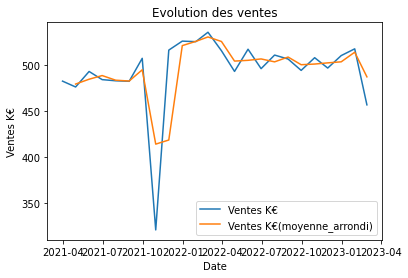

In [38]:
x1=transactionsv1_months['date']
y1=transactionsv1_months['ventes_keuros']
plt.plot(x1, y1, label = "Ventes K€")
x2=transactionsv1_months['date']
y2=transactionsv1_months['month_rolling_avg']
plt.plot(x2, y2, label = "Ventes K€(moyenne_arrondi)")
plt.title('Evolution des ventes')
plt.xlabel('Date')
plt.ylabel('Ventes K€')
plt.legend()          
plt.show()

In [39]:
#Nombre de Transaction par mois
transactionsv1_months_count = transactionsv1_products.groupby(pd.Grouper(key='date', freq='M')).count().reset_index()
transactionsv1_months_count = transactionsv1_months_count[['date', 'price']]
transactionsv1_months_count.rename(columns = {'price':'nombre_transaction'}, inplace = True)
transactionsv1_months_count['pourcentage']= 100 * (transactionsv1_months_count.loc[:,"nombre_transaction"] / Nombre_transaction )
print(transactionsv1_months_count)

         date  nombre_transaction  pourcentage
0  2021-03-31               28601     4.211535
1  2021-04-30               28443     4.188270
2  2021-05-31               28285     4.165004
3  2021-06-30               26850     3.953698
4  2021-07-31               24738     3.642703
5  2021-08-31               25650     3.776997
6  2021-09-30               33314     4.905531
7  2021-10-31               21599     3.180482
8  2021-11-30               28311     4.168832
9  2021-12-31               32457     4.779337
10 2022-01-31               29343     4.320796
11 2022-02-28               29594     4.357756
12 2022-03-31               29696     4.372776
13 2022-04-30               27602     4.064431
14 2022-05-31               29975     4.413859
15 2022-06-30               28504     4.197252
16 2022-07-31               28670     4.221696
17 2022-08-31               28544     4.203142
18 2022-09-30               28306     4.168096
19 2022-10-31               28964     4.264988
20 2022-11-30

In [40]:
#Moyenne mobile pour le CA par mois
transactionsv1_months_count['month_rolling_avg'] = transactionsv1_months_count.nombre_transaction.rolling(window=2).mean()

### Visualisation de l'évolution du nombre de transactions sur les mois

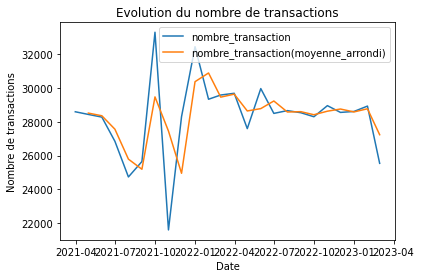

In [41]:
x1=transactionsv1_months_count['date']
y1=transactionsv1_months_count['nombre_transaction']
plt.plot(x1, y1, label = "nombre_transaction")

x2=transactionsv1_months_count['date']
y2=transactionsv1_months_count['month_rolling_avg']
plt.plot(x2, y2, label = "nombre_transaction(moyenne_arrondi)")

plt.title('Evolution du nombre de transactions')
plt.xlabel('Date')
plt.ylabel('Nombre de transactions')
plt.legend()          
plt.show()

#### Restriction par catégorie pour identifier les valeurs manquantes sur le mois d'octobre

In [42]:
transactions_oct = transactionsv1_products[(transactionsv1_products["date"] > '2021-10-01') & (transactionsv1_products["date"] < '2021-11-01')]
len_transactions_oct_cat0= len(transactions_oct[(transactions_oct["categ"] == 0)])
len_transactions_oct_cat1= len(transactions_oct[(transactions_oct["categ"] == 1)])
len_transactions_oct_cat2= len(transactions_oct[(transactions_oct["categ"] == 2)])

In [43]:
print(f"il y a {len_transactions_oct_cat0} transaction de categorie 0 en octobre ")
print(f"il y a {len_transactions_oct_cat1} transaction de categorie 1 en octobre  ")
print(f"il y a {len_transactions_oct_cat2} transaction de categorie 2 en octobre  ")

il y a 18762 transaction de categorie 0 en octobre 
il y a 1666 transaction de categorie 1 en octobre  
il y a 1171 transaction de categorie 2 en octobre  


### Dans le CADRE de CET exercice on considere le mois d'Octobre comme ceci : du 02 et 28 octobre

In [44]:
transactions_octv1 = transactionsv1_products[(transactionsv1_products["date"] > '2021-10-02') & (transactionsv1_products["date"] < '2021-10-28')]
len_transactionsv1_oct_cat0= len(transactions_octv1[(transactions_octv1["categ"] == 0)])
len_transactionsv1_oct_cat1= len(transactions_octv1[(transactions_octv1["categ"] == 1)])
len_transactionsv1_oct_cat2= len(transactions_octv1[(transactions_octv1["categ"] == 2)])

In [45]:
print(f"il y a {len_transactionsv1_oct_cat0} transaction de categorie 0 en octobre   ")
print(f"il y a {len_transactionsv1_oct_cat1} transaction de categorie 1 en octobre  ")
print(f"il y a {len_transactionsv1_oct_cat2} transaction de categorie 2 en octobre  ")

il y a 15859 transaction de categorie 0 en octobre   
il y a 0 transaction de categorie 1 en octobre  
il y a 972 transaction de categorie 2 en octobre  


### Pour la suite de l'étude le mois d'octobre ne sera pas pris en compte, l'analyse se fera sur 11 mois au lieu de 12.

In [46]:
transactionsv2 = transactionsv1[(transactionsv1["date"] < '2021-10-02') | (transactionsv1["date"] > '2021-10-28')]
transactionsv2_products = pd.merge(transactionsv2, products)

In [47]:
transactionsv2_products.price.describe()

count    662280.000000
mean         17.534868
std          18.329220
min           0.620000
25%           8.990000
50%          13.990000
75%          19.080000
max         300.000000
Name: price, dtype: float64

In [48]:
#Calcul de la Mediane des prix produits vendus
mediane = transactionsv2_products['price'].median()
print(mediane)

13.99


In [49]:
#Calcul du Mode des prix produits vendus
mode = transactionsv2_products['price'].mode()
print(mode)

0    15.99
dtype: float64


In [50]:
#Calcul de la Variance des prix produits vendus
variance = round(transactionsv2_products['price'].var(ddof=0), 2)
print(variance)

335.96


### Visualisation (Histogramme)de la distribution des prix produits

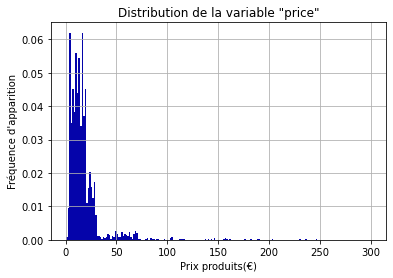

In [51]:
transactionsv2_products['price'].hist(color='#0504aa', density=True, bins=200)
plt.title('Distribution de la variable "price"')
plt.xlabel('Prix produits(€)')
plt.ylabel("Fréquence d'apparition")
plt.show()

In [52]:
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
price = transactionsv2_products['price'].values

### Courbe de Lorenz sur la variables des prix

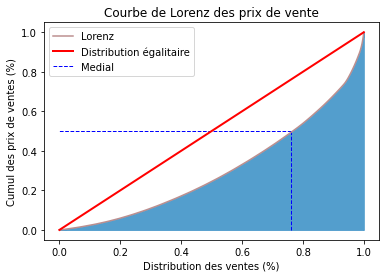

In [53]:
lorenz_price = np.cumsum(np.sort(price)) / price.sum()

plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc="best")

plt.show()

### Représentation des quantités par catégories

In [54]:
quantite = transactionsv2_products['categ'].value_counts()
modalite = quantite.index
categorie = pd.DataFrame(modalite, columns = ['categ'])
categorie["n"] = quantite.values
categorie["pourcentage"] = categorie["n"] / len(transactionsv2_products)
print(categorie)

   categ       n  pourcentage
0      0  399600     0.603370
1      1  227169     0.343011
2      2   35511     0.053619


### Pie Chart pour représenter la part de chacune des catégories de vente

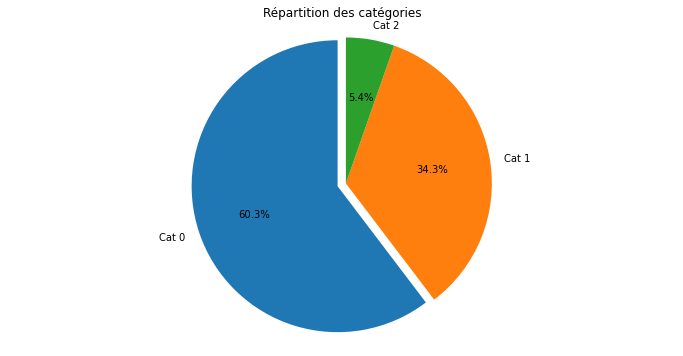

In [55]:
labels = 'Cat 0', 'Cat 1', 'Cat 2'
sizes = categorie['pourcentage']
explode = (0.06, 0, 0)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal') 
plt.title('Répartition des catégories')
plt.show()

### Distribution des prix produits par catégorie avec un boxplot

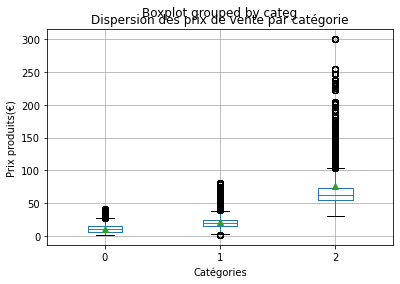

In [56]:
transactionsv2_products.boxplot(column='price', by='categ', showmeans=True)
plt.title('Dispersion des prix de vente par catégorie')
plt.xlabel('Catégories')
plt.ylabel('Prix produits(€)')
plt.show()

In [57]:
#Comptage des produits présents en catégorie 0
nombre_cat_0 = len(transactionsv2_products[transactionsv2_products.categ == 0].groupby('id_prod'))
print(f"Il y a {nombre_cat_0} produits dans la categorie 0")
#Comptage des produits présents en catégorie 1
nombre_cat_1 = len(transactionsv2_products[transactionsv2_products.categ == 1].groupby('id_prod'))
print(f"Il y a {nombre_cat_1} produits dans la categorie 1")
#Comptage des produits présents en catégorie 2
nombre_cat_2 = len(transactionsv2_products[transactionsv2_products.categ == 2].groupby('id_prod'))
print(f"Il y a {nombre_cat_2} produits dans la categorie 2")

Il y a 2290 produits dans la categorie 0
Il y a 737 produits dans la categorie 1
Il y a 236 produits dans la categorie 2


In [58]:
#Creation de la Colonne Age
customersv1.loc[:,"age"] = 2022 - customersv1.loc[:,"birth"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [59]:
transactionsv2_products_customersv1 = pd.merge(transactionsv2_products, customersv1,how="left")

In [60]:
transactionsv2_products_customersv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662280 entries, 0 to 662279
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     662280 non-null  object 
 1   date        662280 non-null  object 
 2   session_id  662280 non-null  object 
 3   client_id   662280 non-null  object 
 4   price       662280 non-null  float64
 5   categ       662280 non-null  int64  
 6   sex         662280 non-null  object 
 7   birth       662280 non-null  int64  
 8   age         662280 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 50.5+ MB


### Recherche d'informations en relation avec le sexe du client

In [61]:
transactionsv2_sexe = transactionsv2_products_customersv1[['price','sex']]

In [62]:
#Tableau recapitulatif du total des ventes selon le sex du client et leur proportion

transactionsv2_sexe_grouped = transactionsv2_sexe.groupby(by="sex").sum()
Total_price=sum(transactionsv2_sexe_grouped["price"])
transactionsv2_sexe_grouped['pourcentage']= 100 * (transactionsv2_sexe_grouped.loc[:,"price"] / Total_price )
print(transactionsv2_sexe_grouped)

          price  pourcentage
sex                         
f    5744680.68    49.467705
m    5868311.55    50.532295


In [63]:
#Tableau recapitulatif du nombre de transaction par categorie et selon le sex du client

transactionsv2_products_cate_sex = transactionsv2_products_customersv1[['categ','sex']]

transactionsv2_products_cate0sex = transactionsv2_products_cate_sex[transactionsv2_products_cate_sex.categ == 0]
transactionsv2_products_cate0sex = transactionsv2_products_cate_sex.groupby(by="sex",as_index=False).count()
transactionsv2_products_cate0sex.rename(columns = {'categ':'categ0'}, inplace = True)

transactionsv2_products_cate1sex = transactionsv2_products_cate_sex[transactionsv2_products_cate_sex.categ == 1]
transactionsv2_products_cate1sex = transactionsv2_products_cate1sex.groupby(by="sex",as_index=False).count()
transactionsv2_products_cate1sex.rename(columns = {'categ':'categ1'}, inplace = True)

transactionsv2_products_cate2sex = transactionsv2_products_cate_sex[transactionsv2_products_cate_sex.categ == 2]
transactionsv2_products_cate2sex = transactionsv2_products_cate2sex.groupby(by="sex",as_index=False).count()
transactionsv2_products_cate2sex.rename(columns = {'categ':'categ2'}, inplace = True)

transactionsv2_products_cate0_1sex = pd.merge(transactionsv2_products_cate0sex,transactionsv2_products_cate1sex,on='sex')
transactionsv2_products_catesex = pd.merge(transactionsv2_products_cate0_1sex,transactionsv2_products_cate2sex
,on='sex')

transactionsv2_products_catesex['Total']=transactionsv2_products_catesex['categ0']+transactionsv2_products_catesex['categ1']+transactionsv2_products_catesex['categ2']
transactionsv2_products_catesex['% categ0']=100 * (transactionsv2_products_catesex['categ0'] / transactionsv2_products_catesex['Total'])
transactionsv2_products_catesex['% categ1']=100 * (transactionsv2_products_catesex['categ1'] / transactionsv2_products_catesex['Total'])
transactionsv2_products_catesex['% categ2']=100 * (transactionsv2_products_catesex['categ2'] / transactionsv2_products_catesex['Total'])

print(transactionsv2_products_catesex)


  sex  categ0  categ1  categ2   Total   % categ0   % categ1  % categ2
0   f  330154  114899   16830  461883  71.480007  24.876213  3.643780
1   m  332126  112270   18681  463077  71.721550  24.244348  4.034102


In [64]:
#Tableau recapitulatif du total des ventes par categorie et selon le sex du client

transactionsv2_products_cate_sex_price = transactionsv2_products_customersv1[['categ','sex','price']]

transactionsv2_products_cate0sex_price = transactionsv2_products_cate_sex_price[transactionsv2_products_cate_sex.categ == 0]
transactionsv2_products_cate0sex_price = transactionsv2_products_cate0sex_price.groupby(by="sex",as_index=False).sum()
transactionsv2_products_cate0sex_price.rename(columns = {'price':'total_categ0'}, inplace = True)
transactionsv2_products_cate0sex_price = transactionsv2_products_cate0sex_price[['sex','total_categ0']]

transactionsv2_products_cate1sex_price = transactionsv2_products_cate_sex_price[transactionsv2_products_cate_sex.categ == 1]
transactionsv2_products_cate1sex_price = transactionsv2_products_cate1sex_price.groupby(by="sex",as_index=False).sum()
transactionsv2_products_cate1sex_price.rename(columns = {'price':'total_categ1'}, inplace = True)
transactionsv2_products_cate1sex_price = transactionsv2_products_cate1sex_price[['sex','total_categ1']]

transactionsv2_products_cate2sex_price = transactionsv2_products_cate_sex_price[transactionsv2_products_cate_sex.categ == 2]
transactionsv2_products_cate2sex_price = transactionsv2_products_cate2sex_price.groupby(by="sex",as_index=False).sum()
transactionsv2_products_cate2sex_price.rename(columns = {'price':'total_categ2'}, inplace = True)
transactionsv2_products_cate2sex_price = transactionsv2_products_cate2sex_price[['sex','total_categ2']]

transactionsv2_products_cate0_1sex_price = pd.merge(transactionsv2_products_cate0sex_price,transactionsv2_products_cate1sex_price,on='sex')
transactionsv2_products_catesex_price = pd.merge(transactionsv2_products_cate0_1sex_price,transactionsv2_products_cate2sex_price,on='sex')


transactionsv2_products_catesex_price['Total']=transactionsv2_products_catesex_price['total_categ0']+transactionsv2_products_catesex_price['total_categ1']+transactionsv2_products_catesex_price['total_categ2']
transactionsv2_products_catesex_price['% categ0']=100 * (transactionsv2_products_catesex_price['total_categ0'] / transactionsv2_products_catesex_price['Total'])
transactionsv2_products_catesex_price['% categ1']=100 * (transactionsv2_products_catesex_price['total_categ1'] / transactionsv2_products_catesex_price['Total'])
transactionsv2_products_catesex_price['% categ2']=100 * (transactionsv2_products_catesex_price['total_categ2'] / transactionsv2_products_catesex_price['Total'])

print(transactionsv2_products_catesex_price)

  sex  total_categ0  total_categ1  total_categ2       Total   % categ0  \
0   f    2108411.46    2358417.02    1277852.20  5744680.68  36.701978   
1   m    2142926.05    2295305.67    1430079.83  5868311.55  36.516910   

    % categ1   % categ2  
0  41.053927  22.244095  
1  39.113562  24.369528  


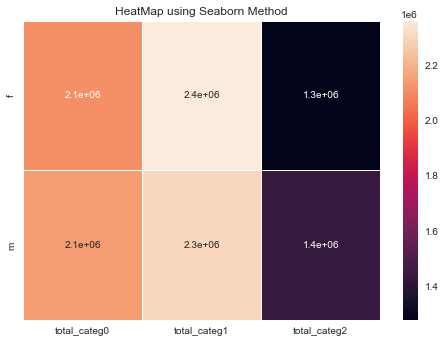

In [65]:
# 1. Import Modules
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")
 
# 2. Generate matrix
data = transactionsv2_products_catesex_price[['total_categ0','total_categ1','total_categ2']]
 
# 3. Plot the heatmap
heat_map = sns.heatmap( data, linewidth = 1 , annot = True, yticklabels = transactionsv2_products_catesex_price['sex'] )
plt.title( "HeatMap using Seaborn Method" )
plt.show()

### Recherche d'informations en relation avec l'age du client

In [66]:
transactionsv2_age = transactionsv2_products_customersv1[['price','age']]

In [67]:
#Tableau avec le total des ventes par age ainsi que leur pourcentage
transactionsv2_age_grouped = transactionsv2_age.groupby(by="age",as_index=False).sum()
Total_price=sum(transactionsv2_age_grouped["price"])
transactionsv2_age_grouped['pourcentage']= 100 * (transactionsv2_age_grouped.loc[:,"price"] / Total_price )
print(transactionsv2_age_grouped)

    age      price  pourcentage
0    18  595100.06     5.124433
1    19  174037.33     1.498643
2    20  179767.64     1.547987
3    21  175223.94     1.508861
4    22  161838.58     1.393599
..  ...        ...          ...
71   89    5212.55     0.044886
72   90    4885.59     0.042070
73   91    2760.83     0.023774
74   92    3993.88     0.034391
75   93    3208.07     0.027625

[76 rows x 3 columns]


Text(0, 0.5, 'total des ventes (en euros)')

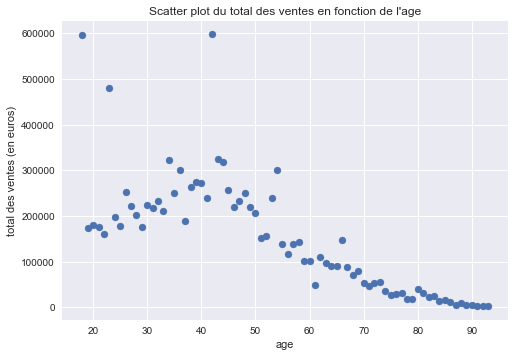

In [68]:
x=transactionsv2_age_grouped['age']
y=transactionsv2_age_grouped['price']
plt.scatter(x,y)
plt.title("Scatter plot du total des ventes en fonction de l'age")
plt.xlabel('age')
plt.ylabel('total des ventes (en euros)')

In [69]:
#Tableau avec le total des ventes par  intervalle d'age ainsi que leur pourcentage
ages =[18, 30, 50, 93]
age_groups = pd.cut(transactionsv2_age_grouped['age'], bins=ages)
transactionsv2_age_intervalle = transactionsv2_age_grouped.groupby(age_groups)[['price','pourcentage']].sum()
print(transactionsv2_age_intervalle)

               price  pourcentage
age                              
(18, 30]  2627430.37    22.624921
(30, 50]  5403822.37    46.532558
(50, 93]  2986639.43    25.718087


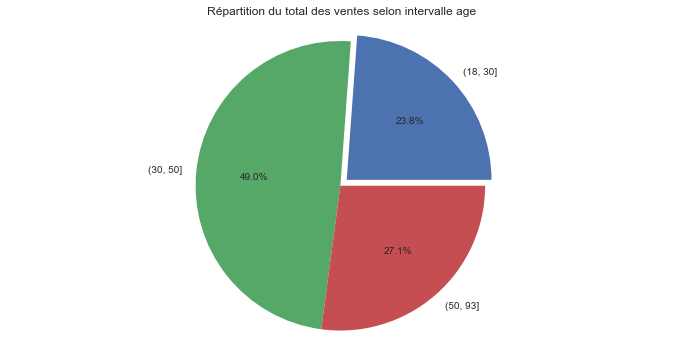

In [70]:
label = transactionsv2_age_intervalle.index
size = transactionsv2_age_intervalle['pourcentage']
explode = (0.06, 0, 0)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(size, explode=explode, labels=label, autopct='%1.1f%%', shadow=False,)

ax1.axis('equal') 
plt.title('Répartition du total des ventes selon intervalle age')
plt.show()

In [71]:
#Tableau du panier moyen en fonction de l'age
transactionsv2_age_moyenne = transactionsv2_age.groupby(by="age",as_index=False).mean()
print(transactionsv2_age_moyenne)

    age      price
0    18  40.036333
1    19  40.777256
2    20  40.064105
3    21  41.949710
4    22  37.393387
..  ...        ...
71   89  16.238474
72   90  16.394597
73   91  16.631506
74   92  17.750578
75   93  16.040350

[76 rows x 2 columns]


Text(0, 0.5, 'panier moyen (en euros)')

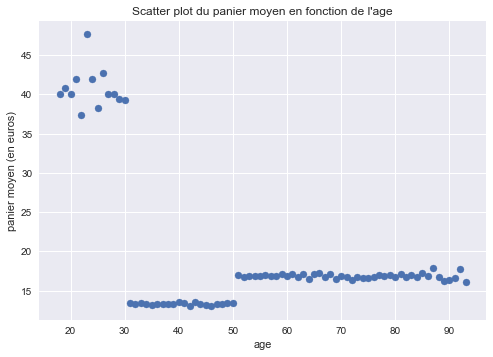

In [72]:
x=transactionsv2_age_moyenne['age']
y=transactionsv2_age_moyenne['price']
plt.scatter(x,y)
plt.title("Scatter plot du panier moyen en fonction de l'age")
plt.xlabel('age')
plt.ylabel('panier moyen (en euros)')

In [73]:
#Tableau du panier moyen en fonction de 3 intervalles d'age
ages =[18, 30, 50, 93]
age_groups2 = pd.cut(transactionsv2_age_moyenne['age'], bins=ages)
transactionsv2_age_moyenne_intervalle = transactionsv2_age_moyenne.groupby(age_groups2)['price'].mean()
print(transactionsv2_age_moyenne_intervalle)

age
(18, 30]    40.814751
(30, 50]    13.306055
(50, 93]    16.839872
Name: price, dtype: float64


In [74]:
#Tableau du nombre de transactions total en fonction de l'age
transactionsv2_age_grouped2 = transactionsv2_age.groupby(by="age",as_index=False).count()
transactionsv2_age_grouped2.rename(columns = {'price':'count'}, inplace = True)
Total_count=sum(transactionsv2_age_grouped2["count"])
transactionsv2_age_grouped2['pourcentage']= 100 * (transactionsv2_age_grouped2.loc[:,"count"] / Total_count )
print(transactionsv2_age_grouped2)

    age  count  pourcentage
0    18  14864     2.244368
1    19   4268     0.644440
2    20   4487     0.677508
3    21   4177     0.630700
4    22   4328     0.653500
..  ...    ...          ...
71   89    321     0.048469
72   90    298     0.044996
73   91    166     0.025065
74   92    225     0.033974
75   93    200     0.030199

[76 rows x 3 columns]


Text(0, 0.5, 'nombre de transaction total')

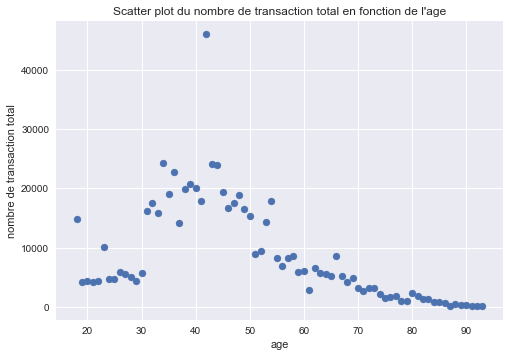

In [75]:
x=transactionsv2_age_grouped2['age']
y=transactionsv2_age_grouped2['count']
plt.scatter(x,y)
plt.title("Scatter plot du nombre de transaction total en fonction de l'age")
plt.xlabel('age')
plt.ylabel('nombre de transaction total')

In [76]:
#Tableau du nombre de transaction total en fonction de 3 intervalles d'age
ages =[18, 30, 50, 93]
age_groups3 = pd.cut(transactionsv2_age_grouped2['age'], bins=ages)
transactionsv2_age_count_intervalle = transactionsv2_age_grouped2.groupby(age_groups3)[['count','pourcentage']].sum()
print(transactionsv2_age_count_intervalle)

           count  pourcentage
age                          
(18, 30]   63445     9.579785
(30, 50]  406729    61.413451
(50, 93]  177242    26.762397


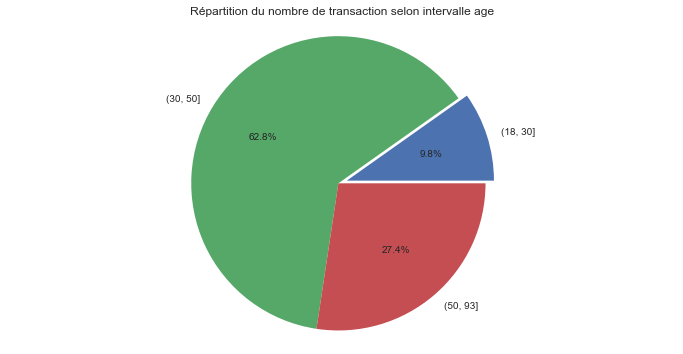

In [77]:
label3 = transactionsv2_age_count_intervalle.index
size3 = transactionsv2_age_count_intervalle['pourcentage']
explode = (0.06, 0, 0)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(size3, explode=explode, labels=label3, autopct='%1.1f%%', shadow=False,)

ax1.axis('equal') 
plt.title('Répartition du nombre de transaction selon intervalle age')
plt.show()

In [78]:
#Tableau du nombre de transaction par catégories et selon l'age
transactionsv2_products_cate = transactionsv2_products_customersv1[['categ','age']]

transactionsv2_products_cate0 = transactionsv2_products_cate[transactionsv2_products_cate.categ == 0]
transactionsv2_products_cate0 = transactionsv2_products_cate0.groupby(by="age",as_index=False).count()
transactionsv2_products_cate0.rename(columns = {'categ':'categ0'}, inplace = True)

transactionsv2_products_cate1 = transactionsv2_products_cate[transactionsv2_products_cate.categ == 1]
transactionsv2_products_cate1 = transactionsv2_products_cate1.groupby(by="age",as_index=False).count()
transactionsv2_products_cate1.rename(columns = {'categ':'categ1'}, inplace = True)

transactionsv2_products_cate2 = transactionsv2_products_cate[transactionsv2_products_cate.categ == 2]
transactionsv2_products_cate2 = transactionsv2_products_cate2.groupby(by="age",as_index=False).count()
transactionsv2_products_cate2.rename(columns = {'categ':'categ2'}, inplace = True)

transactionsv2_products_cate0_1 = pd.merge(transactionsv2_products_cate0,transactionsv2_products_cate1,on='age')
transactionsv2_products_categ = pd.merge(transactionsv2_products_cate0_1,transactionsv2_products_cate2,on='age')
transactionsv2_products_categ['Total']=transactionsv2_products_categ['categ0']+transactionsv2_products_categ['categ1']+transactionsv2_products_categ['categ2']
transactionsv2_products_categ['% categ0']=100 * (transactionsv2_products_categ['categ0'] / transactionsv2_products_categ['Total'])
transactionsv2_products_categ['% categ1']=100 * (transactionsv2_products_categ['categ1'] / transactionsv2_products_categ['Total'])
transactionsv2_products_categ['% categ2']=100 * (transactionsv2_products_categ['categ2'] / transactionsv2_products_categ['Total'])

print(transactionsv2_products_categ)


    age  categ0  categ1  categ2  Total   % categ0   % categ1   % categ2
0    18    3298    5719    5847  14864  22.187836  38.475511  39.336652
1    19     854    1678    1736   4268  20.009372  39.315839  40.674789
2    20     969    1723    1795   4487  21.595721  38.399822  40.004457
3    21     942    1550    1685   4177  22.552071  37.107972  40.339957
4    22    1060    1628    1640   4328  24.491682  37.615527  37.892791
..  ...     ...     ...     ...    ...        ...        ...        ...
71   89     137     183       1    321  42.679128  57.009346   0.311526
72   90     119     177       2    298  39.932886  59.395973   0.671141
73   91      73      91       2    166  43.975904  54.819277   1.204819
74   92      74     149       2    225  32.888889  66.222222   0.888889
75   93      77     122       1    200  38.500000  61.000000   0.500000

[76 rows x 8 columns]


Text(0, 0.5, 'nombre de transaction total')

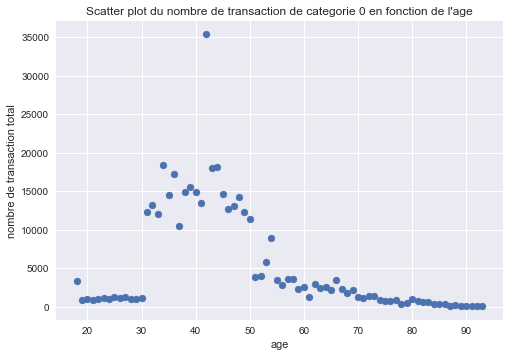

In [79]:
x=transactionsv2_products_categ['age']
y=transactionsv2_products_categ['categ0']
plt.scatter(x,y)
plt.title("Scatter plot du nombre de transaction de categorie 0 en fonction de l'age")
plt.xlabel('age')
plt.ylabel('nombre de transaction total')

In [91]:
#Tableau du nombre de transaction total pour les produits de categorie 0 en fonction de 3 intervalles d'age
ages =[18, 30, 50, 93]
age_groups3 = pd.cut(transactionsv2_products_categ['age'], bins=ages)
transactionsv2_products_cate0["% categ0"]=100 * (transactionsv2_products_cate0['categ0']/sum(transactionsv2_products_cate0['categ0']))
transactionsv2_products_categ0_intervalle = transactionsv2_products_cate0.groupby(age_groups3)[['categ0',"% categ0"]].sum()
print(transactionsv2_products_categ0_intervalle)

          categ0   % categ0
age                        
(18, 30]   12730   3.185686
(30, 50]  307157  76.866116
(50, 93]   76415  19.122873


Text(0, 0.5, 'nombre de transaction total')

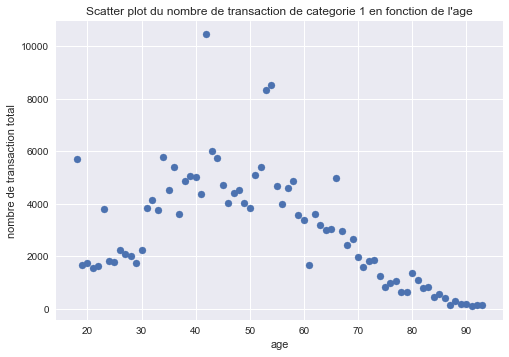

In [80]:
x=transactionsv2_products_categ['age']
y=transactionsv2_products_categ['categ1']
plt.scatter(x,y)
plt.title("Scatter plot du nombre de transaction de categorie 1 en fonction de l'age")
plt.xlabel('age')
plt.ylabel('nombre de transaction total')

In [92]:
#Tableau du nombre de transaction total pour les produits de categorie 1 en fonction de 3 intervalles d'age
ages =[18, 30, 50, 93]
age_groups3 = pd.cut(transactionsv2_products_categ['age'], bins=ages)
transactionsv2_products_cate1["% categ1"]=100 * (transactionsv2_products_cate1['categ1']/sum(transactionsv2_products_cate1['categ1']))
transactionsv2_products_categ1_intervalle = transactionsv2_products_cate1.groupby(age_groups3)[['categ1',"% categ1"]].sum()
print(transactionsv2_products_categ1_intervalle)

          categ1   % categ1
age                        
(18, 30]   24256  10.677513
(30, 50]   98121  43.192953
(50, 93]   99073  43.612025


Text(0, 0.5, 'nombre de transaction total')

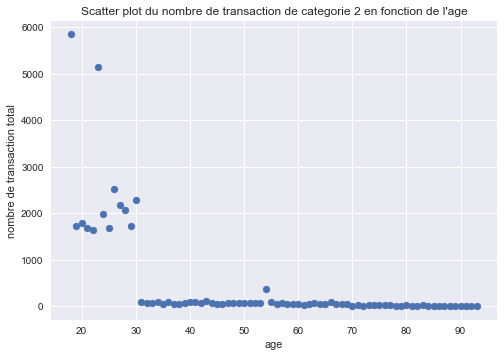

In [81]:
x=transactionsv2_products_categ['age']
y=transactionsv2_products_categ['categ2']
plt.scatter(x,y)
plt.title("Scatter plot du nombre de transaction de categorie 2 en fonction de l'age")
plt.xlabel('age')
plt.ylabel('nombre de transaction total')

In [94]:
#Tableau du nombre de transaction total pour les produits de categorie 2 en fonction de 3 intervalles d'age
ages =[18, 30, 50, 93]
age_groups3 = pd.cut(transactionsv2_products_categ['age'], bins=ages)
transactionsv2_products_cate2["% categ2"]=100 * (transactionsv2_products_cate2['categ2']/sum(transactionsv2_products_cate2['categ2']))
transactionsv2_products_categ2_intervalle = transactionsv2_products_cate2.groupby(age_groups3)[['categ2',"% categ2"]].sum()
print(transactionsv2_products_categ2_intervalle)

          categ2   % categ2
age                        
(18, 30]   26459  74.509307
(30, 50]    1451   4.086058
(50, 93]    1754   4.939315


### Tests Statistiques